<a href="https://colab.research.google.com/github/aws3ma/machine-learning/blob/main/sc4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
ml_folder='/content/drive/MyDrive/ML/'

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv(ml_folder+'crimes.csv',sep=";")
df.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [ ]:
df.corr()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


In [ ]:
labels = df.iloc[:,0]
labels.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: Etat , dtype: object

In [ ]:
x = df.iloc[:,1:]
x.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
Xsc=sc.transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca=PCA()
x_pca = pca.fit_transform(Xsc)
pca.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

In [ ]:
X2 = df.iloc[:,:3]
X2.head()

,Etat,Meutre,Rapt
0,Alabama,14.2,25.2
1,Alaska,10.8,51.6
2,Arizona,9.5,34.2
3,Arkansas,8.8,27.6
4,California,11.5,49.4


In [ ]:
labels[1]

'Alaska'

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MNIST. PCA projection')

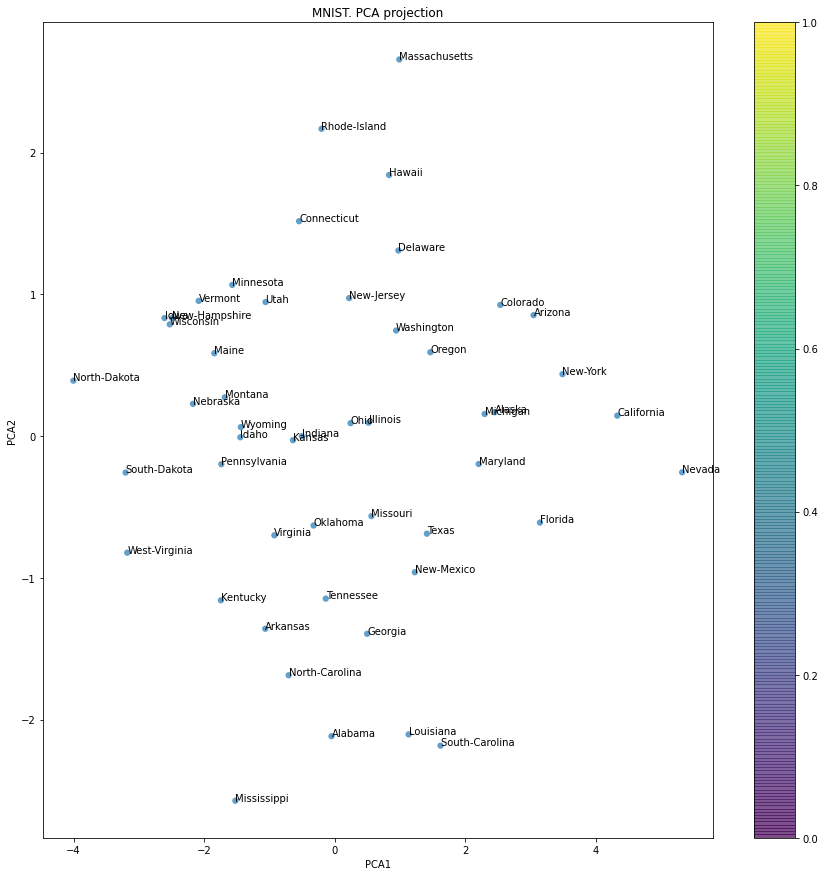

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x_pca[:, 0], x_pca[:, 1], edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
for i in range (0,50):
    plt.annotate(labels[i], (x_pca[i,0],x_pca[i,1])) #annotation pour noter les noms des etats
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.title('MNIST. PCA projection')

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

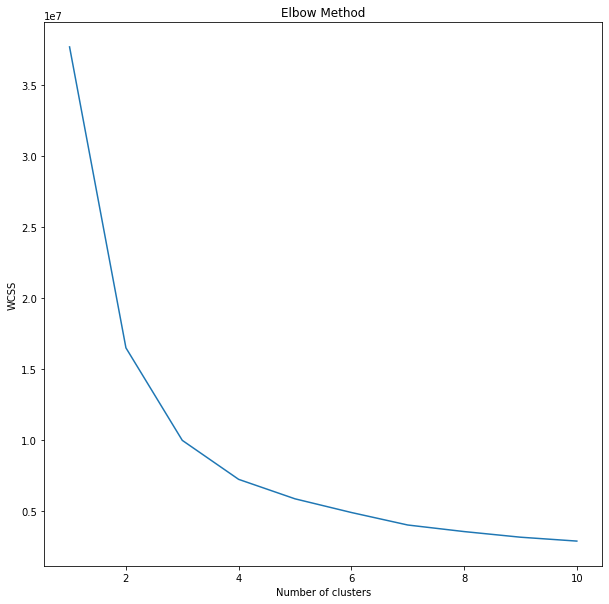

In [ ]:
wcss = []
plt.figure(figsize=(10,10))

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


3


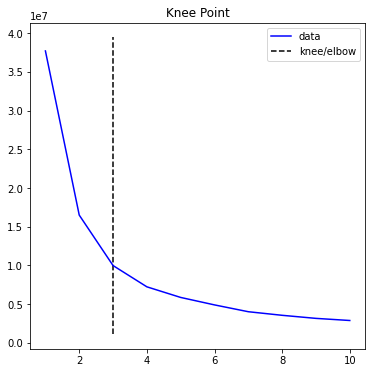

In [ ]:
kneedle = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print(kneedle.elbow)
kneedle.plot_knee()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

Text(0.5, 1.0, 'MNIST. PCA projection')

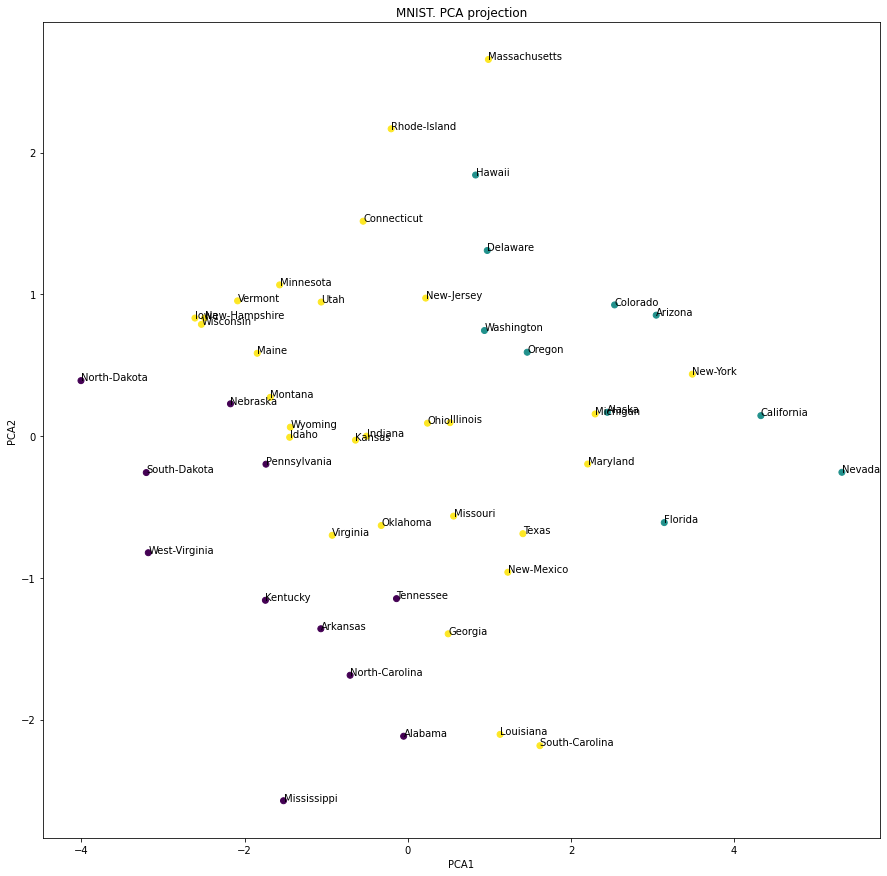

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans.labels_)
for i in range (0,50):
    plt.annotate(labels[i], (x_pca[i,0],x_pca[i,1])) #annotation pour noter les noms des etats
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('MNIST. PCA projection')

In [ ]:
kmeans_scaled = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_scaled.fit(Xsc)

KMeans(n_clusters=3, random_state=0)

Text(0.5, 1.0, 'MNIST. PCA projection')

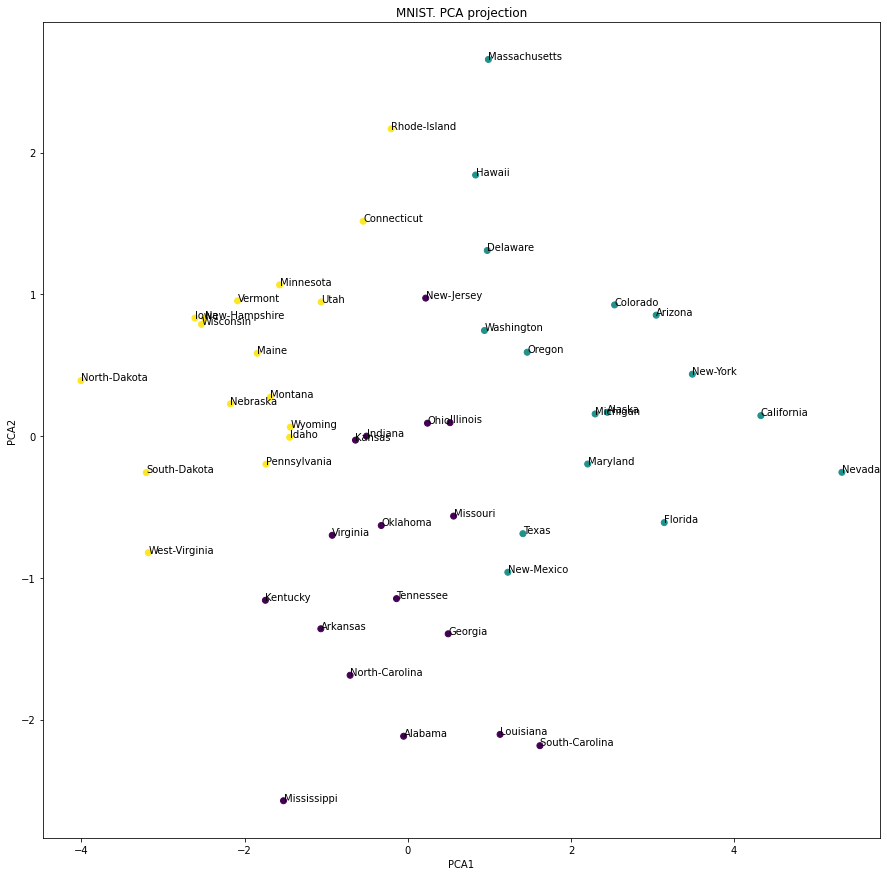

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans_scaled.labels_)
for i in range (0,50):
    plt.annotate(labels[i], (x_pca[i,0],x_pca[i,1])) #annotation pour noter les noms des etats
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('MNIST. PCA projection')

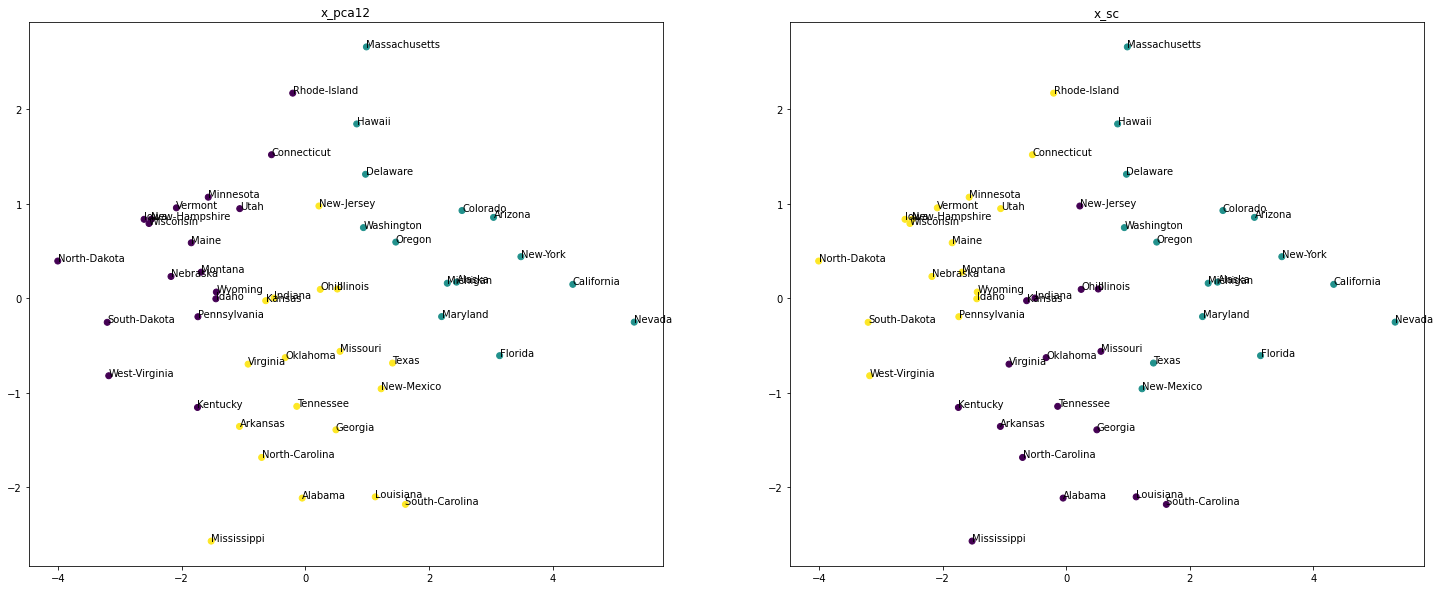

In [ ]:
kmeans_pca12 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_pca12.fit(x_pca[:,:2])
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
ax1.set_title("x_pca12")
ax1.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans_pca12.labels_)
for i in range (0,50):
    ax1.annotate(labels[i], (x_pca[i,0],x_pca[i,1]))
ax2.set_title("x_sc")
ax2.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans_scaled.labels_)
for i in range (0,50):
    ax2.annotate(labels[i], (x_pca[i,0],x_pca[i,1]))

fig.show()

In [ ]:
print(kmeans_pca12.labels_)
print(kmeans_scaled.labels_)

[2 1 1 2 1 1 0 1 1 2 1 0 2 2 0 2 0 2 0 1 1 1 0 2 2 0 0 1 0 2 2 1 2 0 2 2 1
 0 0 2 0 2 2 0 0 2 1 0 0 0]
[0 1 1 0 1 1 2 1 1 0 1 2 0 0 2 0 0 0 2 1 1 1 2 0 0 2 2 1 2 0 1 1 0 2 0 0 1
 2 2 0 2 0 1 2 2 0 1 2 2 2]


In [ ]:
labels[kmeans_pca12.labels_!=kmeans_scaled.labels_]

0             Alabama
3            Arkansas
6         Connecticut
9             Georgia
11              Idaho
12           Illinois
13            Indiana
14               Iowa
15             Kansas
17          Louisiana
18              Maine
22          Minnesota
23        Mississippi
24           Missouri
25            Montana
26           Nebraska
28      New-Hampshire
29         New-Jersey
30         New-Mexico
32    North-Carolina 
33       North-Dakota
34               Ohio
35           Oklahoma
37       Pennsylvania
38       Rhode-Island
39    South-Carolina 
40       South-Dakota
41          Tennessee
42              Texas
43               Utah
44            Vermont
45           Virginia
47      West-Virginia
48          Wisconsin
49            Wyoming
Name: Etat , dtype: object